<a href="https://colab.research.google.com/github/anajikadam17/Google-Colab/blob/main/NLP/Reddit_Vaccine_Myths_SA_Vader_SpacyTextBlob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis using Vader

### Reddit Vaccine Myths Data Analysis

Dataset From Kaggle [https://www.kaggle.com/gpreda/reddit-vaccine-myths](https://www.kaggle.com/gpreda/reddit-vaccine-myths)

Data contains both posts and comments. Both posts and comments contains the following fields:

1. title - relevant for posts

2. score - relevant for posts - based on impact, number of

3. id - unique id for posts/comments

4. url - relevant for posts - url of post thread

5. commns_num - relevant for post - number of comments to this post

6. created - date of creation

7. body - relevant for posts/comments - text of the post or comment

8. timestamp - timestamp

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import string
from string import punctuation, digits
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
data_path = r"/content/drive/MyDrive/Colab/NLP/Data/reddit_vm.csv"
df = pd.read_csv(data_path)
df.shape

(1561, 8)

In [ ]:
df.head()

,title,score,id,url,comms_num,created,body,timestamp
0,Health Canada approves AstraZeneca COVID-19 va...,7,lt74vw,https://www.canadaforums.ca/2021/02/health-can...,0,1.614400e+09,NaN,2021-02-27 06:33:45
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,lsh0ij,https://www.canadaforums.ca/2021/02/covid-19-i...,1,1.614316e+09,NaN,2021-02-26 07:11:07
2,Coronavirus variants could fuel Canada's third...,6,lohlle,https://www.canadaforums.ca/2021/02/coronaviru...,0,1.613887e+09,NaN,2021-02-21 07:50:08
3,Canadian government to extend COVID-19 emergen...,1,lnptv8,https://www.canadaforums.ca/2021/02/canadian-g...,0,1.613796e+09,NaN,2021-02-20 06:35:13
4,Canada: Pfizer is 'extremely committed' to mee...,6,lkslm6,https://www.canadaforums.ca/2021/02/canada-pfi...,0,1.613468e+09,NaN,2021-02-16 11:36:28


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1561 non-null   object 
 1   score      1561 non-null   int64  
 2   id         1561 non-null   object 
 3   url        460 non-null    object 
 4   comms_num  1561 non-null   int64  
 5   created    1561 non-null   float64
 6   body       1192 non-null   object 
 7   timestamp  1561 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 97.7+ KB


In [ ]:
df['score'].unique()

array([   7,    2,    6,    1,    5,   10,    0,    3,    4,    8,   -6,
         -1,   13,    9,   12,   20,   11,   41,   17,   16,   29,   21,
         15,   26,   22,   14,   30,   36,   19,   25,   23,   28,   18,
         45, 1186,   24,   -3,   -2,   -4,  -11,   -5,  -10])

In [ ]:
df['score'].nunique()

42

In [ ]:
#title with high score
print(df[df['score']==1186]['title'])

472    I would rage if this was handed to me...
Name: title, dtype: object


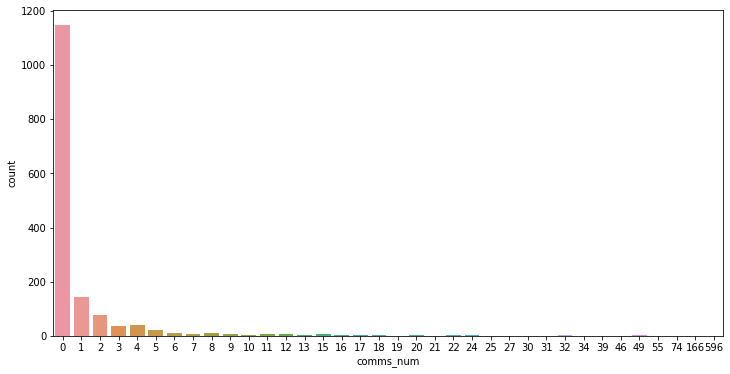

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(df['comms_num'])

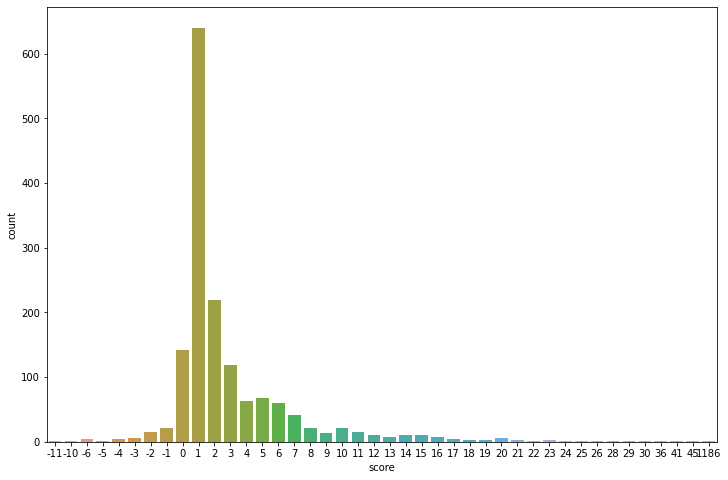

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df['score'])

In [ ]:
#high score and high comments
df[df['comms_num']==596]

,title,score,id,url,comms_num,created,body,timestamp
472,I would rage if this was handed to me...,1186,21zc6n,http://m.imgur.com/a/bZDWg,596,1.396406e+09,NaN,2014-04-02 05:32:42


In [ ]:
df['title'].value_counts()

Comment                                                                                                                                                                  1101
No real quote from this guy. You just have to read what he's writing. He's completely bungling immunology.                                                                  1
I want my Mumps and Measles Back in my Baby, I want my Mumps and Measles Back in my Baby, I want my Mumps and Measles Back in my Baby...Chili's Baby Anti Vax Idiots!       1
Vaccines exposed                                                                                                                                                            1
Vaccine                                                                                                                                                                     1
                                                                                                                                  

In [ ]:

#considering title without 'comment' or 'Comment'
title = df[(df['title'] != 'comment') & (df['title'] != 'Comment')]['title']
title

0      Health Canada approves AstraZeneca COVID-19 va...
1      COVID-19 in Canada: 'Vaccination passports' a ...
2      Coronavirus variants could fuel Canada's third...
3      Canadian government to extend COVID-19 emergen...
4      Canada: Pfizer is 'extremely committed' to mee...
                             ...                        
580    I am a father of five unvaccinated children. A...
581          Love Them. Protect Them. Never Inject Them.
582                 Vaccines Are Just Asping For Trouble
583    Dr. Harper explained in her presentation that ...
584    Polio arose in the US at a period where pestic...
Name: title, Length: 460, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
words = ''

#processing the title
for val in title:
        # print(val)
        #remove numbers
        rm_num = ''.join(char for char in val if not char.isdigit())
        #remove puntuations
        rm_pun = ''.join(char for char in rm_num if char not in punctuation)
        
        # split the value 
        tokens = rm_pun.split()
    
        # Converts each token into lowercase 
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower() 
    
        #exclude the extra words
        words += " ".join(word for word in tokens if word not in stopwords.words('english'))+" "

In [ ]:
words

'health canada approves astrazeneca covid vaccine covid canada vaccination passports near certainty says bioethicist coronavirus variants could fuel canadas third wave canadian government extend covid emergency benefits canada pfizer extremely committed meeting vaccine delivery targets canada oxfordastrazeneca vaccine approval expected week fuck antivaxxing retards covid músicos que han recibido la vacuna antivaccine points refuted thousand times vitamin k shot contain mcg aluminum injected aluminum absorbed vaccine debate group juts started you’re interested joining biologically possible insert g tracker human via vaccine homeopaths scam practitioners peddling dangerous myths dont see reason trust jj vaccine casting covid vaccine volunteers freezer truck drivers others death myth 😂🤣🤣🤣😂🤣enlarged hearts people get enlarged hearts microwaved already definitely vaccines vaccine approved nursing mothers rant please compiled vaers information reality advice needed convince friend get vaccin

In [ ]:
#Building wordcloud
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', colormap = 'rainbow',
                stopwords = stopwords, 
                min_font_size = 10).generate(words)

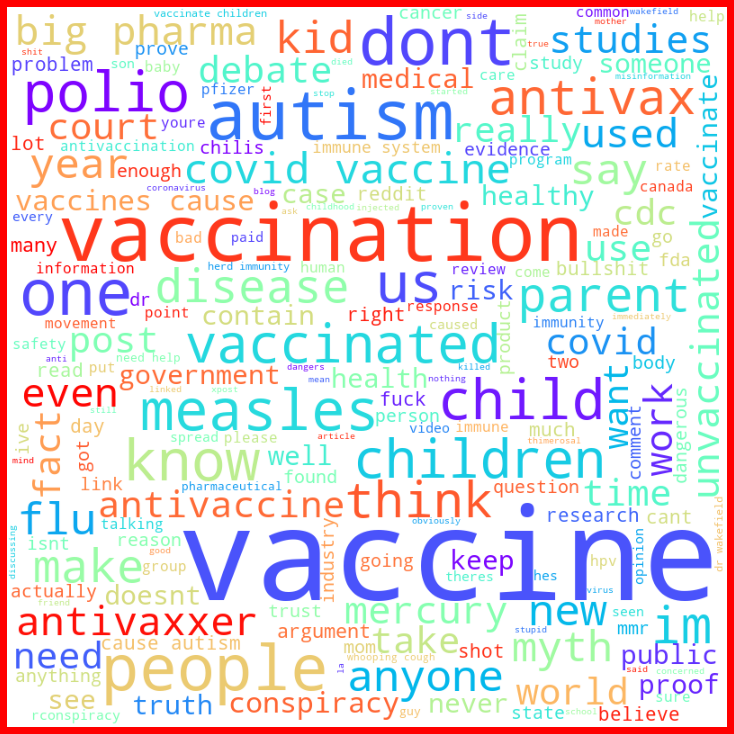

In [ ]:
plt.figure(figsize = (10,10), facecolor = 'red') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [ ]:
df = df[(df['title'] != 'comment') & (df['title'] != 'Comment')]

In [ ]:
#Sentiment Analyser
sa = SentimentIntensityAnalyzer()
df['scores'] = df['title'].apply(lambda text: sa.polarity_scores(text))

In [ ]:
df['title'].value_counts()

No real quote from this guy. You just have to read what he's writing. He's completely bungling immunology.                                                                                              1
Vaccine                                                                                                                                                                                                 1
Typical debate with an anti-vaxer (I'm teal)                                                                                                                                                            1
The argument for 'herd immunity' is completely invalid, because one person should not be able to compel another to do something they don't want to protect the first person. That is simply tyranny.    1
"There is a bot-based campaign to ATTACK NAA - a great org - started at the kitchen table of real autism Moms"                                                                                  

In [ ]:
df = df[['scores','title']]
df

,scores,title
0,"{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'comp...",Health Canada approves AstraZeneca COVID-19 va...
1,"{'neg': 0.0, 'neu': 0.8, 'pos': 0.2, 'compound...",COVID-19 in Canada: 'Vaccination passports' a ...
2,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",Coronavirus variants could fuel Canada's third...
3,"{'neg': 0.239, 'neu': 0.367, 'pos': 0.394, 'co...",Canadian government to extend COVID-19 emergen...
4,"{'neg': 0.0, 'neu': 0.79, 'pos': 0.21, 'compou...",Canada: Pfizer is 'extremely committed' to mee...
...,...,...
580,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",I am a father of five unvaccinated children. A...
581,"{'neg': 0.0, 'neu': 0.424, 'pos': 0.576, 'comp...",Love Them. Protect Them. Never Inject Them.
582,"{'neg': 0.351, 'neu': 0.649, 'pos': 0.0, 'comp...",Vaccines Are Just Asping For Trouble
583,"{'neg': 0.276, 'neu': 0.665, 'pos': 0.058, 'co...",Dr. Harper explained in her presentation that ...


In [ ]:
#computing the compound score
df['compound']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

In [ ]:

def compute_score(c):
    if c > 0.0:
        return 'positive'
    elif c == 0:
        return 'neutral'
    else:
        return 'negative'
df['compound_score'] = df['compound'].apply(lambda c :compute_score(c))

In [ ]:
df[['title','compound','compound_score']]

,title,compound,compound_score
0,Health Canada approves AstraZeneca COVID-19 va...,0.4019,positive
1,COVID-19 in Canada: 'Vaccination passports' a ...,0.2500,positive
2,Coronavirus variants could fuel Canada's third...,0.0000,neutral
3,Canadian government to extend COVID-19 emergen...,0.1779,positive
4,Canada: Pfizer is 'extremely committed' to mee...,0.3384,positive
...,...,...,...
580,I am a father of five unvaccinated children. A...,0.0000,neutral
581,Love Them. Protect Them. Never Inject Them.,0.7783,positive
582,Vaccines Are Just Asping For Trouble,-0.4019,negative
583,Dr. Harper explained in her presentation that ...,-0.8883,negative


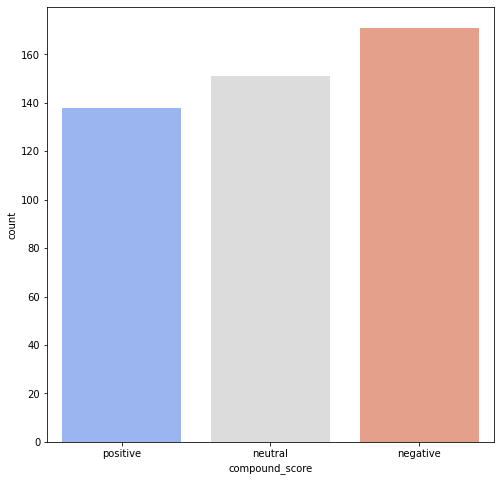

In [ ]:
plt.figure(figsize = (8,8)) 
sns.countplot(df['compound_score'],palette = 'coolwarm')

# SA using SpacyTextBlob


In [ ]:
data_path = r"/content/drive/MyDrive/Colab/NLP/Data/reddit_vm.csv"
df = pd.read_csv(data_path)
df.shape

(1561, 8)

In [ ]:
df.drop(columns=['comms_num','id','url','created','timestamp','body'], inplace=True)
df.head()

,title,score
0,Health Canada approves AstraZeneca COVID-19 va...,7
1,COVID-19 in Canada: 'Vaccination passports' a ...,2
2,Coronavirus variants could fuel Canada's third...,6
3,Canadian government to extend COVID-19 emergen...,1
4,Canada: Pfizer is 'extremely committed' to mee...,6


In [ ]:
#Lowercase the text columns
df['title'] = df['title'].astype(str)

df['title'] = df['title'].apply(lambda word: " ".join(word.lower() for word in word.split()))

df

,title,score
0,health canada approves astrazeneca covid-19 va...,7
1,covid-19 in canada: 'vaccination passports' a ...,2
2,coronavirus variants could fuel canada's third...,6
3,canadian government to extend covid-19 emergen...,1
4,canada: pfizer is 'extremely committed' to mee...,6
...,...,...
1556,comment,1
1557,comment,2
1558,comment,4
1559,comment,1


In [ ]:
# Removing The StopWords
from nltk.corpus import stopwords


df['title'] = df['title'].apply(lambda sent: " ".join(x for x in sent.split() if x not in stopwords.words('english')))
df.head(5)

,title,score
0,health canada approves astrazeneca covid-19 va...,7
1,covid-19 canada: 'vaccination passports' near ...,2
2,coronavirus variants could fuel canada's third...,6
3,canadian government extend covid-19 emergency ...,1
4,canada: pfizer 'extremely committed' meeting v...,6


## Finding Sensitivity And Subjectivity For The Textual Columns

### Polarity:

For determining the polarity, a score of -0.05 we tag as negative and anything above 0.05 we tag as positive. Anything in between inclusively, we tag as neutral Its range lies between [-1,1].

### Subjectivity:

Generally refers to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].
Closer to 0 means its factual, and closer to 1 means its a public opinion.

In [ ]:
!pip install spacy
!pip install spacytextblob
!python -m spacy download en
!python -m textblob.download_corpora

In [ ]:
# import spacy
# nlp = spacy.load('en_core_web_sm')

In [ ]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

In [ ]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
text = "I had a really horrible day. It was the worst day ever! But every now and then I have a really good day that makes me happy."

nlp = spacy.load('en_core_web_sm')
nlp.add_pipe("spacytextblob")
doc = nlp(text)
print(doc)
print('Polarity:', doc._.polarity)
print('Sujectivity:', doc._.subjectivity)
print('Assessments:', doc._.assessments)

I had a really horrible day. It was the worst day ever! But every now and then I have a really good day that makes me happy.
Polarity: -0.125
Sujectivity: 0.9
Assessments: [(['really', 'horrible'], -1.0, 1.0, None), (['worst', '!'], -1.0, 1.0, None), (['really', 'good'], 0.7, 0.6000000000000001, None), (['happy'], 0.8, 1.0, None)]


In [ ]:
#Calculating the Polarity and Subjectivity
spaceit = spacy.load('en_core_web_sm')
# stb = SpacyTextBlob(spaceit)
spaceit.add_pipe("spacytextblob")

In [ ]:
#Calculating the Polarity and Subjectivity

df['title_subjectivity'] = df['title'].apply(lambda x: spaceit(x)._.subjectivity)
df['title_polarity'] = df['title'].apply(lambda x: spaceit(x)._.polarity)
df.head(5)

,title,score,title_subjectivity,title_polarity
0,health canada approves astrazeneca covid-19 va...,7,0.0,0.000
1,covid-19 canada: 'vaccination passports' near ...,2,0.4,0.100
2,coronavirus variants could fuel canada's third...,6,0.0,0.000
3,canadian government extend covid-19 emergency ...,1,0.0,0.000
4,canada: pfizer 'extremely committed' meeting v...,6,1.0,-0.125


In [ ]:

from wordcloud import WordCloud
import plotly.express as px
import matplotlib.style as style

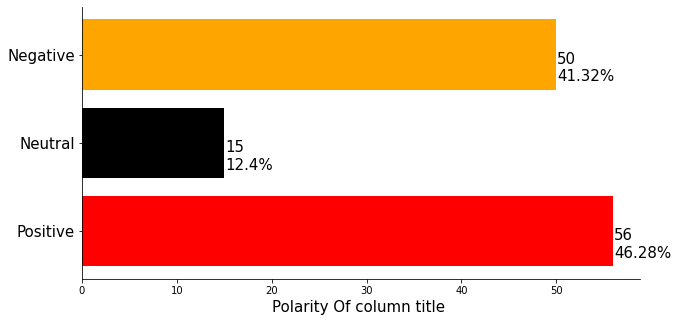

In [ ]:
# Checking Polarity For Column Title
tp=pd.DataFrame()
tp['positive']=df['title_polarity'].apply(lambda x : x if(x > 0.05) else None)
tp['negative']=df['title_polarity'].apply(lambda x:  x if(x<=-0.05) else None)
tp['neutral']=df['title_polarity'].apply(lambda x: x if(x>-0.05 and x<=.05) else None)
# tp

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

ax = fig.add_subplot(111)

counts = [len((tp['positive']).value_counts()),len(tp['neutral'].value_counts()),len((tp['negative']).value_counts())]

percents = [100*x/sum(counts) for x in counts]

y_ax = ('Positive','Neutral','Negative')
y_tick = np.arange(len(y_ax))

ax.barh(range(len(counts)), counts, align = "center", color = ['red', 'black', 'orange'])
ax.set_yticks(y_tick)
ax.set_yticklabels(y_ax, size = 15)
ax.set_facecolor('xkcd:white')

plt.xlabel('Polarity Of column title ', size=15)



for i, y in enumerate(ax.patches):
    label_per = percents[i]
    ax.text(y.get_width()+.09, y.get_y()+.3, str(round((y.get_width()), 1)), fontsize=15)
    
    ax.text(y.get_width()+.09, y.get_y()+.1, str(f'{round((label_per), 2)}%'), fontsize=15)

sns.despine()
plt.show()

Important points:

nearly 46% titles are postive.

In [ ]:
# Title Sentiment Polarity Vs Subjectivity
df['Title_Sentiment_Value']=df['title_polarity'].apply(lambda x : 'Neutral' if(x>-0.05 and x<=.05) else ('Negative' if(x<=-0.05) else 'Positive'))


fig = px.scatter(df, x="title_polarity", y="title_subjectivity", color="Title_Sentiment_Value",)
fig.update_layout(legend = dict(bgcolor = 'yellow'))
fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)',
'paper_bgcolor': 'rgba(0, 0, 0, 0)',
})
fig.show()

Length of Positive words in title and body are: 11911


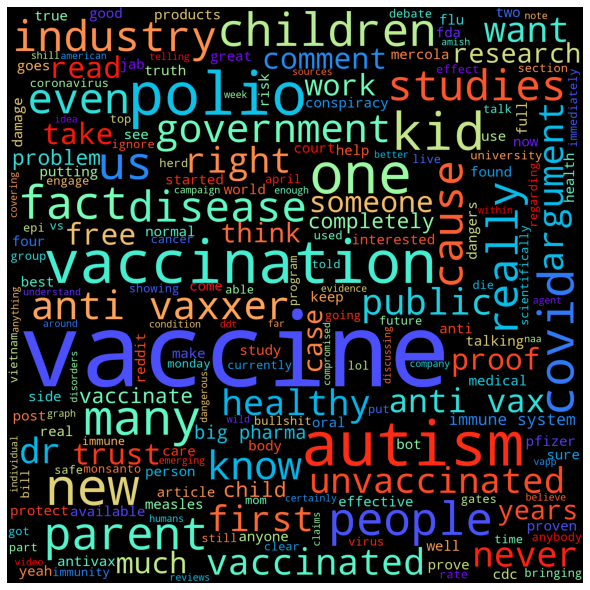

In [ ]:
# Creating WordCloud For Positive Words
title_positive_polarity_words = ' '" ".join(x for x in (df[df['title_polarity']>0.05])['title'].astype(str))
print('Length of Positive words in title and body are:',len(title_positive_polarity_words))
positive_words=''
positive_words=title_positive_polarity_words


wordcloud=WordCloud(width = 2000, height = 2000, 
                background_color ='black', colormap = 'rainbow',
                min_font_size = 20).generate(positive_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

Length of negative words in title and body are: 8517



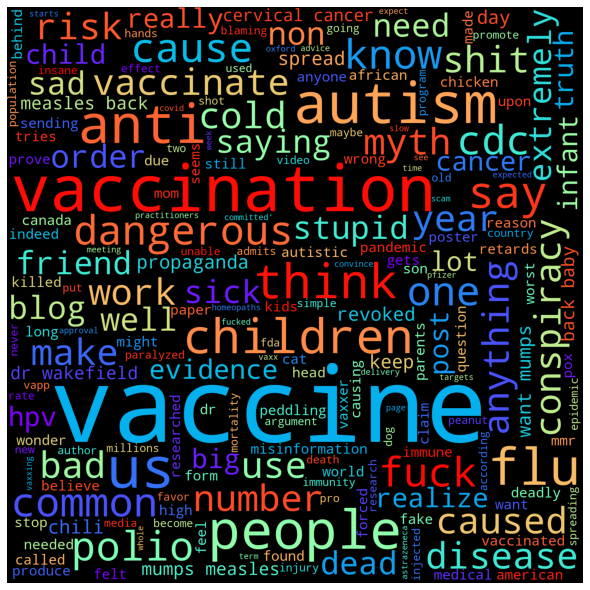

In [ ]:
# Creating WordCloud For Negative Words
title_negative_polarity_words = ' '" ".join(x for x in (df[df['title_polarity']<-0.05])['title'].astype(str))
print('Length of negative words in title and body are:',len(title_negative_polarity_words))
negative_words=''
negative_words=title_negative_polarity_words
print()


wordcloud=WordCloud(width = 2000, height = 2000, 
                background_color ='black', colormap = 'rainbow',
                min_font_size = 20).generate(negative_words)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()